In [7]:
import numpy as np
import matplotlib.pyplot as plt
import sys

sys.path.append("/Users/Sophie/git/MCcubed/")
import MCcubed as mc3   # Add path to mc3 if necessary
plt.ion()

import pandas as pd
df_ground = pd.read_csv("../data/k2_28b/K2_data_k2_28b_for_plotting_ground.csv",sep=",",header=0)
df_k2 = pd.read_csv("../data/k2_28b/K2_data_k2_28b_for_plotting_k2.csv",sep=",",header=0)

df_ground_k2_100b = pd.read_csv("../data/k2_100b/K2_data_k2_100b_for_plotting_ground.csv",sep=",",header=0)
df_k2_k2_100b = pd.read_csv("../data/k2_100b/K2_data_k2_100b_for_plotting_k2.csv",sep=",",header=0)

df_ground_k2_104b = pd.read_csv("../data/k2_104b/K2_data_k2_104b_for_plotting_ground.csv",sep=",",header=0)
df_k2_k2_104b = pd.read_csv("../data/k2_104b/K2_data_k2_104b_for_plotting_k2.csv",sep=",",header=0)

In [8]:
# ---------- Graphics ------------
# matplotlib
import seaborn as sns; sns.set()
sns.set_context("poster",font_scale=0.5,rc={"font":"helvetica"});
sns.set_style("white"); #sns.set_style("ticks")
cp = sns.color_palette("colorblind") #sns.palplot(current_palette)

%matplotlib inline
#%matplotlib osx
#%matplotlib nbagg
%config InlineBackend.figure_format = "retina"
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams["savefig.dpi"] = 100
#rcParams["text.usetex"] = True #uncomment to use tex. Slow, but pretty
#rcParams["font.weight"] = 900

rcParams['mathtext.fontset'] = 'stix'
rcParams['font.family'] = 'STIXGeneral'
rcParams['font.weight'] = "normal"
rcParams["axes.formatter.useoffset"] = False
rcParams['xtick.major.width']=1
rcParams['xtick.major.size']=4
rcParams['xtick.minor.width']=0.5
rcParams['xtick.minor.size']=2
rcParams['xtick.direction'] = "in"
rcParams['ytick.direction'] = "in"
rcParams['ytick.major.width']=1
rcParams['ytick.major.size']=4
rcParams['ytick.minor.width']=0.5
rcParams['ytick.minor.size']=2

In [3]:
from __future__ import print_function
import pandas as pd
import numpy as np
import datetime
import matplotlib.dates as mdates
import seaborn as sns; sns.set()
sns.set_context("poster",font_scale=0.5,rc={"font":"helvetica"});
sns.set_style("white"); #sns.set_style("ticks")
cp = sns.color_palette("colorblind") #sns.palplot(current_palette)
%matplotlib inline
%config InlineBackend.figure_format = "retina"
import matplotlib.pyplot as plt
import sys
sys.path.append("../src/")

import getpass
# Remove gks paths (not needed for anyone else)
if getpass.getuser()=="gks":
    try:
        sys.path.remove("/Users/gks/Dropbox/mypylib/notebooks/GIT/transitMCMC/src")
        sys.path.remove("/Users/gks/Dropbox/mypylib")
    except Exception as e:
        print(e)
        print("Paths already removed")

In [4]:
from priors import PriorSet, UP, NP, JP
import trf
import pyde
import mcmc_utils
from exotk.utils.likelihood import ll_normal_ev_py, ll_normal_es, ll_normal_ev
import batman
import math
import epicblsmulti
import k2help
import utils

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("/Users/Sophie/git/MCcubed/")
#sys.path.append("/Users/gks/programs/MCcubed2/MCcubed") # Add path to mc3 if necessary
import allanvariancemc_modified 
import pandas as pd

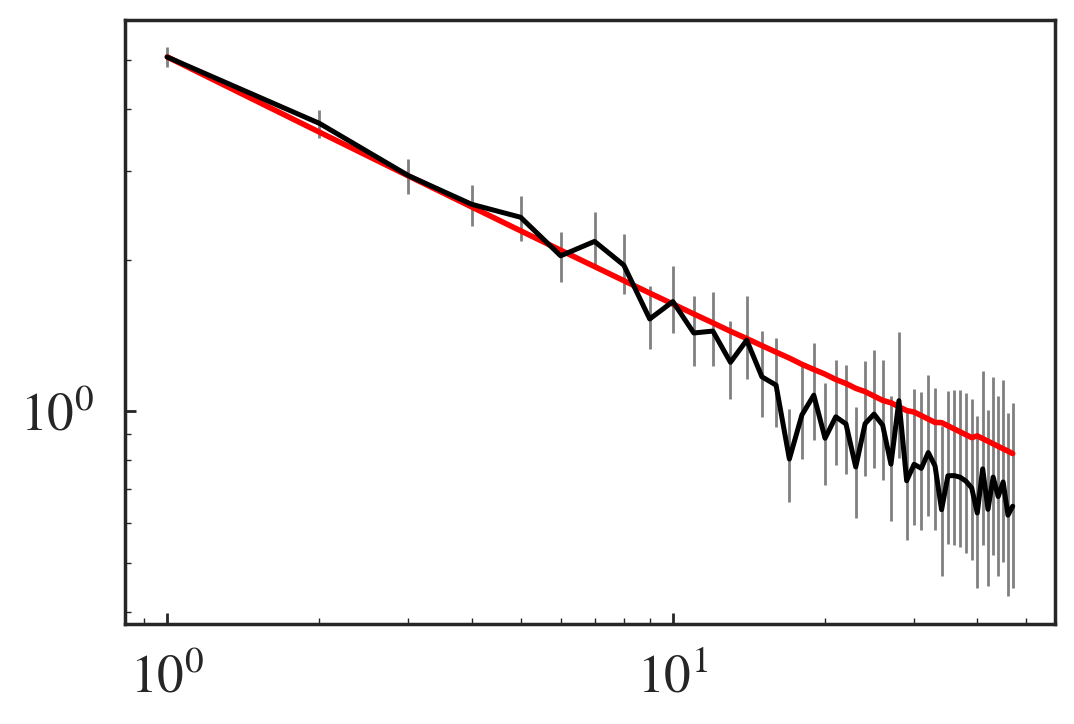

In [6]:
#creating allan variance plot


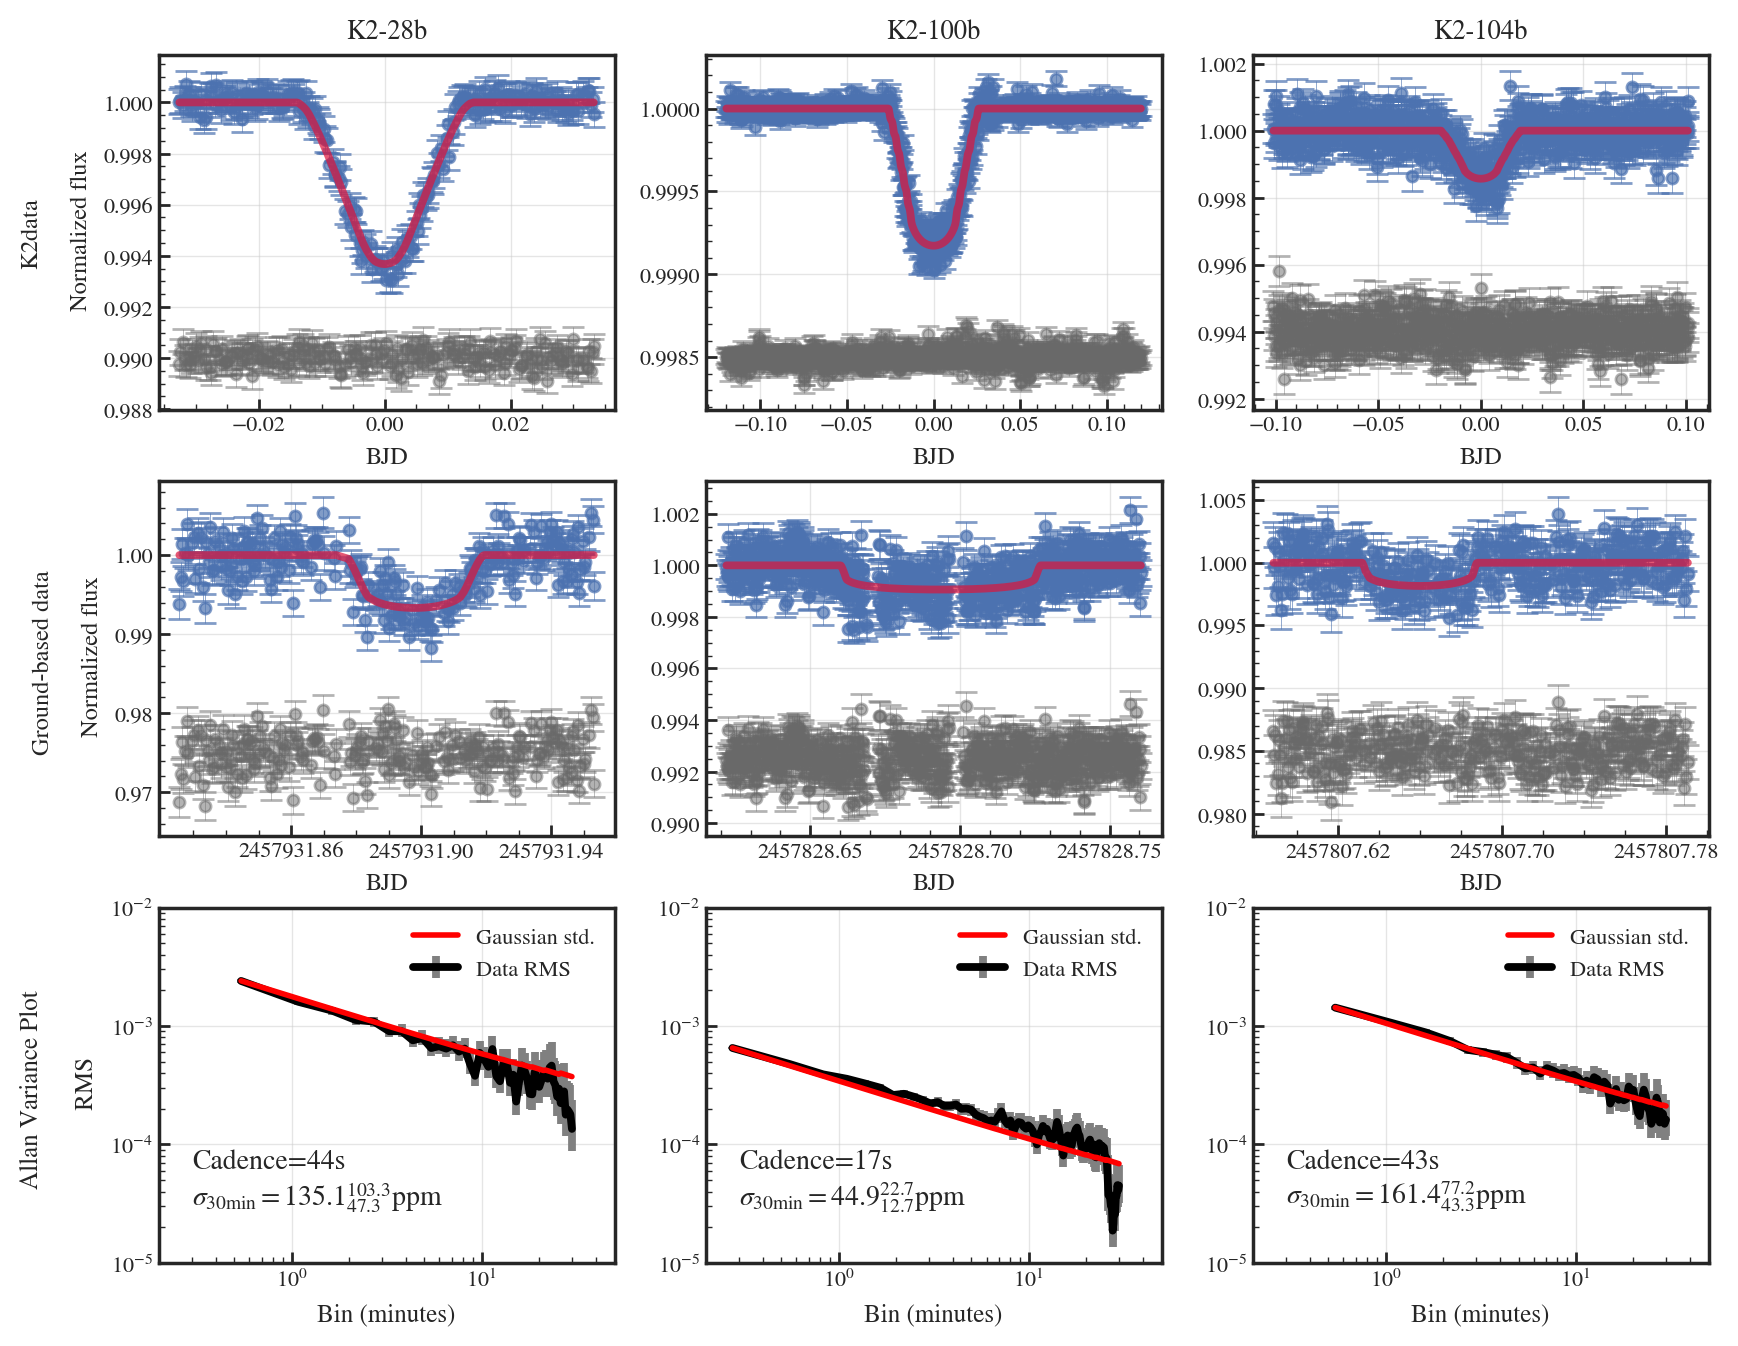

In [137]:
import plot_transits
# create a 9 panel plot
fig, axx = plt.subplots(nrows=3,ncols=3,figsize=(10,8))
(ax,bx,cx),(dx,ex,fx),(gx,hx,ix) = axx


#k2-28b
plot_transits.plot_transit_with_model(df_k2['phase_fold_time_k2'],
                        df_k2['phase_fold_scaled_flux_k2'],
                        df_k2['scaled_error_k2'],
                        yresidual=df_k2['yresidual_k2'],
                        xmodel=df_k2['xmodel_k2'],
                        ymodel=df_k2['ymodel_k2'],ax=ax)
plot_transits.plot_transit_with_model(df_ground['time_ground'],
                        df_ground['scaled_flux_ground'],
                        df_ground['scaled_error_ground'],
                        yresidual=df_ground['yresidual_ground'],
                        xmodel=df_ground['xmodel_ground'],
                        ymodel=df_ground['ymodel_ground'],
                        offset=0.975,ax=dx)

# (Sinusoidal) time-correlated signal:
red = np.array(df_ground['yresidual_ground'])
# Generate residuals signal:
N = len(red)
# White-noise signal:
white = np.random.normal(0, 5, N)
# Compute the residuals rms-vs-binsize:
maxbins = int(1800/32.5728267431)
rms, rmslo, rmshi, stderr, binsz = mc3.rednoise.binrms(red, maxbins)
gx.errorbar(binsz*32.5728267431/60., rms, yerr=[rmslo, rmshi], fmt="k-", ecolor='0.5', capsize=0, label="Data RMS",zorder=3)
gx.loglog(binsz*32.5728267431/60., stderr, color='red', ls='-', lw=2, label="Gaussian std.",zorder=5)
handles,labels = gx.get_legend_handles_labels()
handles = [handles[0],  handles[1]]
labels = [labels[0],  labels[1]]
gx.legend(handles,labels,loc="upper right")
gx.set_xlabel("Bin (minutes)", fontsize=9)
gx.set_ylabel("RMS", fontsize=9)
label_28b = "$\sigma_{30\mathrm{min}} = %0.1f^{%0.1f}_{%0.1f}$ppm" % (rms[-1]*1e6,rmshi[-1]*1e6,rmslo[-1]*1e6)
gx.text(0.3,3e-5,'Cadence=44s\n'+label_28b)





#k2-104b
plot_transits.plot_transit_with_model(df_k2_k2_100b['phase_fold_time_k2'],
                        df_k2_k2_100b['phase_fold_scaled_flux_k2'],
                        df_k2_k2_100b['scaled_error_k2'],
                        yresidual=df_k2_k2_100b['yresidual_k2'],
                        xmodel=df_k2_k2_100b['xmodel_k2'],
                        ymodel=df_k2_k2_100b['ymodel_k2'],ax=bx,offset=0.9985)
plot_transits.plot_transit_with_model(df_ground_k2_100b['time_ground'],
                        df_ground_k2_100b['scaled_flux_ground'],
                        df_ground_k2_100b['scaled_error_ground'],
                        yresidual=df_ground_k2_100b['yresidual_ground'],
                        xmodel=df_ground_k2_100b['xmodel_ground'],
                        ymodel=df_ground_k2_100b['ymodel_ground'],
                        offset=0.9925,ax=ex)
# (Sinusoidal) time-correlated signal:
red_100b = np.array(df_ground_k2_100b['yresidual_ground'])
# Generate residuals signal:
N_100b=len(red_100b)
# White-noise signal:
white_100b = np.random.normal(0, 5, N_100b)
# Compute the residuals rms-vs-binsize:
maxbins_100b = int(1800/16.5888056159)
rms_100b, rmslo_100b, rmshi_100b, stderr_100b, binsz_100b = mc3.rednoise.binrms(red_100b, maxbins_100b)
hx.errorbar(binsz_100b*16.5888056159/60., rms_100b, yerr=[rmslo_100b, rmshi_100b], fmt="k-", ecolor='0.5', capsize=0, label="Data RMS",zorder=2)
hx.loglog(binsz_100b*16.5888056159/60., stderr_100b, color='red', ls='-', lw=2, label="Gaussian std.",zorder=5)
handles_100b,labels_100b = hx.get_legend_handles_labels()
handles_100b = [handles_100b[0], handles_100b[1]]
labels_100b = [labels_100b[0], labels_100b[1]]
hx.legend(handles_100b,labels_100b,loc="upper right")
hx.set_xlabel("Bin (minutes)", fontsize=9)
label_100b = "$\sigma_{30\mathrm{min}} = %0.1f^{%0.1f}_{%0.1f}$ppm" % (rms_100b[-1]*1e6,rmshi_100b[-1]*1e6,rmslo_100b[-1]*1e6)
hx.set_ylabel("RMS", fontsize=9)
hx.text(0.3,3e-5,'Cadence=17s\n'+label_100b)




#avmc = allanvariancemc_modified.AllanVarianceMC()
#avmc.compute_noise(df_ground_k2_100b['yresidual_ground'])
#avmc.plot(ax=hx)


#k2-104b
plot_transits.plot_transit_with_model(df_k2_k2_104b['phase_fold_time_k2'],
                        df_k2_k2_104b['phase_fold_scaled_flux_k2'],
                        df_k2_k2_104b['scaled_error_k2'],
                        yresidual=df_k2_k2_104b['yresidual_k2'],
                        xmodel=df_k2_k2_104b['xmodel_k2'],
                        ymodel=df_k2_k2_104b['ymodel_k2'],offset=0.994,ax=cx)
plot_transits.plot_transit_with_model(df_ground_k2_104b['time_ground'],
                        df_ground_k2_104b['scaled_flux_ground'],
                        df_ground_k2_104b['scaled_error_ground'],
                        yresidual=df_ground_k2_104b['yresidual_ground'],
                        xmodel=df_ground_k2_104b['xmodel_ground'],
                        ymodel=df_ground_k2_104b['ymodel_ground'],
                        offset=0.985,ax=fx)

# (Sinusoidal) time-correlated signal:
red_104b = np.array(df_ground_k2_104b['yresidual_ground'])
# Generate residuals signal:
N_104b = len(red_104b)
# White-noise signal:
white_104b = np.random.normal(0, 5, N_104b)
cadence = 32.5728267431
# Compute the residuals rms-vs-binsize:
maxbins_104b =int(30*60/cadence)
rms_104b, rmslo_104b, rmshi_104b, stderr_104b, binsz_104b = mc3.rednoise.binrms(red_104b, maxbins_104b)
label_104b = "$\sigma_{30\mathrm{min}} = %0.1f^{%0.1f}_{%0.1f}$ppm" % (rms_104b[-1]*1e6,rmshi_104b[-1]*1e6,rmslo_104b[-1]*1e6)
ix.errorbar(binsz_104b*cadence/60., rms_104b, yerr=[rmslo_104b, rmshi_104b], fmt="k-", ecolor='0.5', capsize=0, label="Data RMS",zorder=3)
ix.loglog(binsz_104b*cadence/60., stderr_104b, color='red', ls='-', lw=2, label="Gaussian std.",zorder=5)
handles_104b,labels_104b = ix.get_legend_handles_labels()
handles_104b = [handles_104b[0],  handles_104b[1]]
labels_104b = [labels_104b[0], labels_104b[1]]
ix.legend(handles_104b,labels_104b,loc="upper right")
ix.set_xlabel("Bin (minutes)", fontsize=9)
ix.set_ylabel("RMS", fontsize=9)
ix.text(0.3,3e-5,'Cadence=43s\n'+label_104b)

axes = [ax,bx,cx,dx,fx,ex,gx,hx,ix]
[axx.tick_params(axis='both',labelsize=8,pad=2) for axx in axes];
for axx in [dx]:
    #axx.margins(x=0.)
    ticks = axx.get_xticks()
    new_ticks = [2457931.86,2457931.90,2457931.94]
    #new_ticks = np.linspace(ticks[0],ticks[-1],3)
    axx.set_xticks(new_ticks)
    
for axx in [fx]:
    #axx.margins(x=0.)
    ticks = axx.get_xticks()
    new_ticks = [2457807.62,2457807.70,2457807.78]
    #new_ticks = np.linspace(ticks[0],ticks[-1],3)
    axx.set_xticks(new_ticks)    
    
ax.set_title("K2-28b")
bx.set_title("K2-100b")
cx.set_title("K2-104b") 
ax.set_ylabel("\large K2 data \n \n Normalized flux",)
dx.set_ylabel("Ground-based data \n \n Normalized flux")
gx.set_ylabel("Allan Variance Plot \n \n RMS")

for axx in [gx,hx,ix]:
    axx.set_ylim(1e-5,1e-2)
    axx.set_xlim(0.2,50.)
    #ix.set_ylim(0,10)

for axx in [bx,cx,ex,fx,hx,ix]:
    axx.set_ylabel("")
    
for axx in axes:
    axx.grid(lw=0.5,alpha=0.5)

#plt.tight_layout()
plt.savefig('../data/9_panel_plot.pdf',format='pdf')

In [138]:
"${:0.1f}^{:0.1f}_{:0.1f}$".format(rms_100b[-1]*1e6,rmshi_100b[-1]*1e6,rmslo_100b[-1]*1e6)

'$44.9^22.7_12.7$'

'$161.4^{77.2}_{43.3}$'

In [90]:
np.std(df_ground_k2_104b['yresidual_ground'])

0.0014281734805618477